In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_raw = pd.read_csv("/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv") #, nrows=int(1e6))

In [5]:
df = df_raw.copy(deep=True)
#df.info()

In [6]:
#Dataset's shape
df.shape

(6362620, 11)

In [7]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [8]:
list(df.columns.values)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldBalanceOrig',
 'newBalanceOrig',
 'nameDest',
 'oldBalanceDest',
 'newBalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [9]:
df.head(3)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [10]:
df.tail(3)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest          object
oldBalanceDest    float64
newBalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99]).round(2).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
step,6362620.0,243.40,142.33,1.0,156.00,239.00,335.00,399.00,681.00,7.430000e+02
amount,6362620.0,179861.90,603858.23,0.0,13389.57,74871.94,208721.48,365423.31,1615979.47,9.244552e+07
oldBalanceOrig,6362620.0,833883.10,2888242.67,0.0,0.00,14208.00,107315.18,1822508.29,16027256.13,5.958504e+07
newBalanceOrig,6362620.0,855113.67,2924048.50,0.0,0.00,0.00,144258.41,1970344.79,16176160.56,4.958504e+07
oldBalanceDest,6362620.0,1100701.67,3399180.11,0.0,0.00,132705.66,943036.71,2914266.67,12371819.15,3.560159e+08
newBalanceDest,6362620.0,1224996.40,3674128.94,0.0,0.00,214661.44,1111909.25,3194869.67,13137866.94,3.561793e+08
isFraud,6362620.0,0.00,0.04,0.0,0.00,0.00,0.00,0.00,0.00,1.000000e+00
isFlaggedFraud,6362620.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.000000e+00


In [13]:
#Check null values
df.isnull().values.any()  #df.isnull().sum()

False

In [14]:
# 'isFlaggedFraud' column analysis
df_temp_Frag_verification = df[df['isFraud']==1]
print("Total Fraud:",df_temp_Frag_verification.shape[0])
print("\n\n'isFraud'x'isFlaggedFraud' Analysis: \n\n",(df_temp_Frag_verification.groupby(['isFraud','isFlaggedFraud'])['step'].size()))
print("\n'isFlaggedFraud' accuracity:", (df[df['isFlaggedFraud']==1].shape[0]/df_temp_Frag_verification.shape[0]))

Total Fraud: 8213


'isFraud'x'isFlaggedFraud' Analysis: 

 isFraud  isFlaggedFraud
1        0                 8197
         1                   16
Name: step, dtype: int64

'isFlaggedFraud' accuracity: 0.0019481310118105442


In [15]:
del df_temp_Frag_verification

In [16]:
#Conclusion: The 'isFlaggedFraud' accuracity is almost irrelevant, we will drop it from our dataset soon.

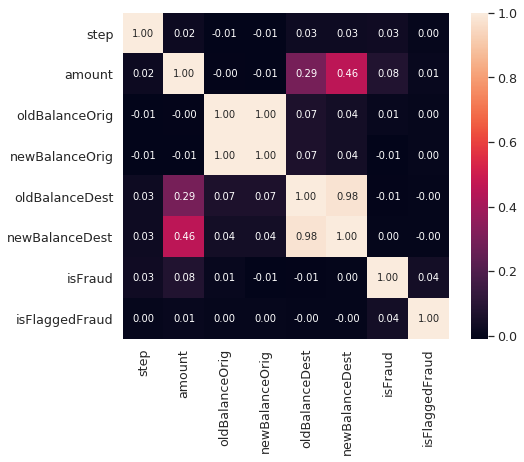

In [17]:
corrmat = df.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

If you see in the correlation values in heatmap, we observe that these features are highly correlated:
            newBalanceDest and oldBalanceDest
            newBalanceOrig and oldBalanceOrig
Hence we can remove one of the two features for each one. Let's remove oldBalanceDest and oldBalanceOrig too in the future.

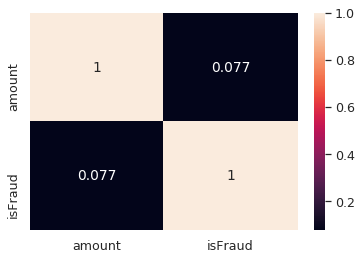

In [18]:
sns.heatmap(df[['amount','isFraud']].corr(),annot = True)

In [19]:
df['step_day'] = df['step'].map(lambda x: x//24)

In [20]:
df['hour'] = df['step_day'].map(lambda x: x%24)

In [21]:
df['step_week'] = df['step_day'].map(lambda x: x//7)

Text(0.5, 1.0, '# of transactions by days of the month')

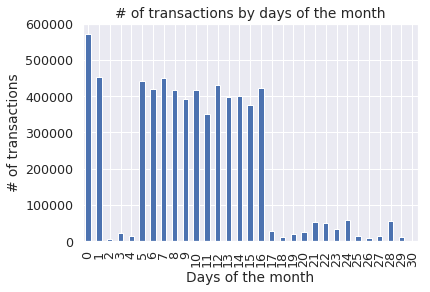

In [22]:
df['step_day'].value_counts().sort_index(ascending=True).plot('bar')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of transactions by days of the month")

Text(0.5, 1.0, '# of transactions by hours of the day')

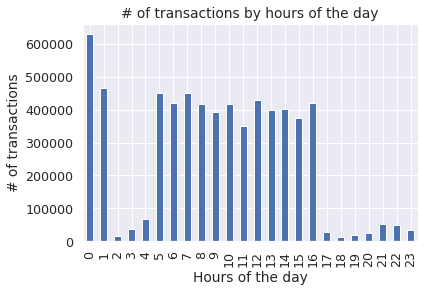

In [23]:
df['hour'].value_counts().sort_index(ascending=True).plot('bar')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of transactions by hours of the day")

Text(0.5, 1.0, '# of transactions by weeks of the month')

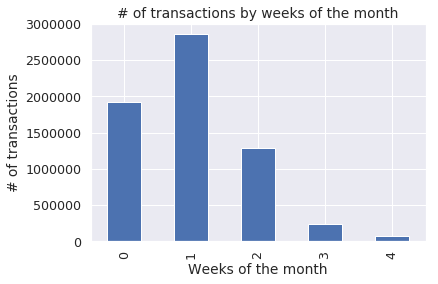

In [24]:
df['step_week'].value_counts().sort_index(ascending=True).plot('bar')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of transactions by weeks of the month")

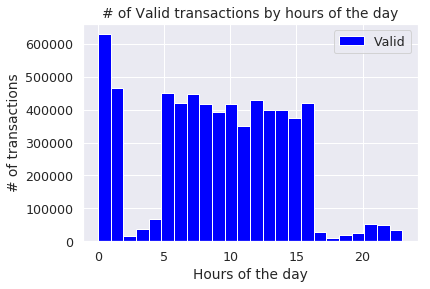

In [25]:
df[(df.isFraud == 0)]['hour'].plot.hist(bins=24,color='blue',label='Valid')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by hours of the day")
plt.legend()
plt.show()


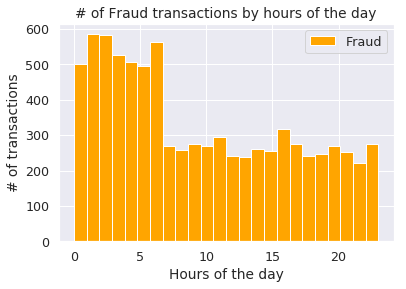

In [26]:
df[(df.isFraud == 1)]['hour'].plot.hist(bins=24,color='orange',label='Fraud')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by hours of the day")
plt.legend()
plt.show()

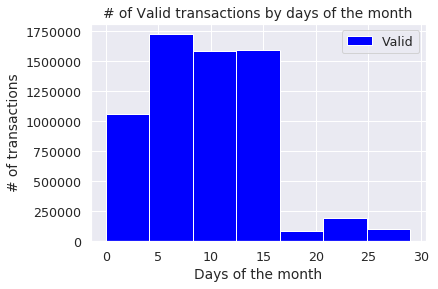

In [27]:
df[(df.isFraud == 0)]['step_day'].plot.hist(bins=7,color='blue',label='Valid')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by days of the month")
plt.legend()
plt.show()

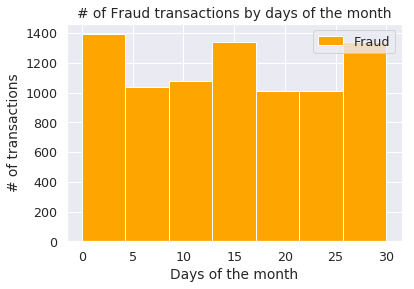

In [28]:
fig, ax = plt.subplots() #1,2, figsize=(7,9)
df[(df.isFraud == 1)]['step_day'].plot.hist(bins=7,color='orange',label='Fraud')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by days of the month")
plt.legend()
plt.show()

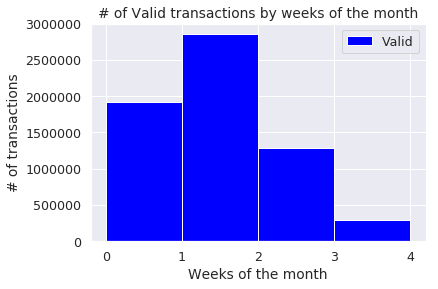

In [29]:
df[(df.isFraud == 0)]['step_week'].plot.hist(bins=4,color='blue',label='Valid')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by weeks of the month")
plt.legend()
plt.show()

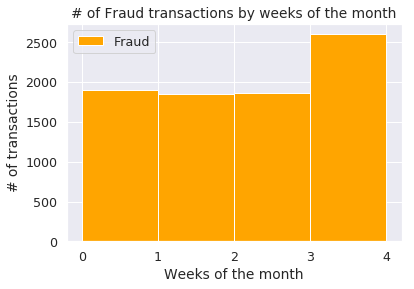

In [30]:
df[(df.isFraud == 1)]['step_week'].plot.hist(bins=4,color='orange',label='Fraud')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by weeks of the month")
plt.legend()
plt.show()

In [31]:
df['ID_NO'] = df.nameOrig.map(lambda x: x[:1])
df['ID_NO'].value_counts()

C    6362620
Name: ID_NO, dtype: int64

In [32]:
df['ID_ND'] = df.nameDest.map(lambda x: x[:1])
df['ID_ND'].value_counts(1)

C    0.661854
M    0.338146
Name: ID_ND, dtype: float64

In [33]:
df['ID']=df['ID_NO']+df['ID_ND']
df['ID'].value_counts(1).round(2)

CC    0.66
CM    0.34
Name: ID, dtype: float64

In [34]:
df.groupby(['type','isFraud'])['type'].count()   #,'amount_O','amount_D'

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: type, dtype: int64

In [35]:
df['wrong_orig_bal'] = np.where((df["oldBalanceOrig"] - df["amount"] - df["newBalanceOrig"]>0.01)|(df["oldBalanceOrig"] - df["amount"] - df["newBalanceOrig"]<-0.01),1,0)
df['wrong_dest_bal'] = np.where((df["newBalanceDest"] + df["amount"] - df["newBalanceDest"]>0.01)|(df["newBalanceDest"] + df["amount"] - df["newBalanceDest"]>0.01),1,0)

In [36]:
df.groupby(['wrong_orig_bal','isFraud']).size()#/len(df)).round(4)*100

wrong_orig_bal  isFraud
0               0          1276761
                1             8168
1               0          5077646
                1               45
dtype: int64

In [37]:
(df.groupby(['wrong_orig_bal','isFraud']).size()/len(df)).round(4)*100

wrong_orig_bal  isFraud
0               0          20.07
                1           0.13
1               0          79.80
                1           0.00
dtype: float64

In [38]:
df.groupby(['wrong_dest_bal','isFraud']).size()#/len(df)).round(4)*100

wrong_dest_bal  isFraud
0               1               16
1               0          6354407
                1             8197
dtype: int64

In [39]:
(df.groupby(['wrong_dest_bal','isFraud']).size()/len(df)).round(4)*100

wrong_dest_bal  isFraud
0               1           0.00
1               0          99.87
                1           0.13
dtype: float64

In [40]:
df.head(5).T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181,181,11668.1
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldBalanceOrig,170136,21249,181,181,41554
newBalanceOrig,160296,19384.7,0,0,29885.9
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldBalanceDest,0,0,0,21182,0
newBalanceDest,0,0,0,0,0
isFraud,0,0,1,1,0


In [41]:
df['nameOrig'].value_counts().sort_values(ascending=False).head(10)

C1902386530    3
C363736674     3
C1462946854    3
C1065307291    3
C724452879     3
C2098525306    3
C2051359467    3
C400299098     3
C1784010646    3
C545315117     3
Name: nameOrig, dtype: int64

In [42]:
round(len(df['nameOrig'].value_counts())/len(df),3)*100

99.9

In [43]:
df['nameDest'].value_counts().sort_values(ascending=False).head(10)


C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [44]:
round(len(df['nameDest'].value_counts())/len(df),3)*100

42.8

In [45]:
De_Para_type={'type':['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],'type_num':[0,1,2,3,4]}
De_Para_ID={'ID':['CC','CM','MC','MM'],'ID_num':[0,1,10,11]}
df_Dp_type = pd.DataFrame(De_Para_type, columns = ['type', 'type_num'])
df_Dp_ID = pd.DataFrame(De_Para_ID, columns = ['ID', 'ID_num'])
print(df_Dp_ID)
print()
print(df_Dp_type)

   ID  ID_num
0  CC       0
1  CM       1
2  MC      10
3  MM      11

       type  type_num
0   PAYMENT         0
1  TRANSFER         1
2  CASH_OUT         2
3     DEBIT         3
4   CASH_IN         4


In [46]:
df_temp = pd.merge(df, df_Dp_type, left_on='type', right_on='type')
df = pd.merge(df_temp, df_Dp_ID, left_on='ID', right_on='ID')
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,...,step_day,hour,step_week,ID_NO,ID_ND,ID,wrong_orig_bal,wrong_dest_bal,type_num,ID_num
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,0,0,0,C,M,CM,0,1,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,0,0,0,C,M,CM,0,1,0,1
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,0,0,0,C,M,CM,0,1,0,1
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,...,0,0,0,C,M,CM,0,1,0,1
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,...,0,0,0,C,M,CM,0,1,0,1


In [47]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [48]:
#Get dummies for the type feature
df_get_type = pd.get_dummies(df['type'], drop_first=True)

In [49]:
df = pd.concat([df,df_get_type],axis=1)

In [50]:
#del df_Dp_ID, df_Dp_type, df_get_type

In [51]:
df.head(3).T

,0,1,2
step,1,1,1
type,PAYMENT,PAYMENT,PAYMENT
amount,9839.64,1864.28,11668.1
nameOrig,C1231006815,C1666544295,C2048537720
oldBalanceOrig,170136,21249,41554
newBalanceOrig,160296,19384.7,29885.9
nameDest,M1979787155,M2044282225,M1230701703
oldBalanceDest,0,0,0
newBalanceDest,0,0,0
isFraud,0,0,0


In [52]:
#Dropping features as previously mentioned
df_clean = df.drop(columns=['type','nameOrig','oldBalanceOrig','nameDest','oldBalanceDest','isFlaggedFraud'], axis=1) #inplace=True

In [53]:
df_clean = df_clean.drop(columns=['ID_NO','ID_ND','ID'], axis=1)
#df_clean = df_clean.drop(columns=['type'], axis=1)

In [54]:
df_clean.head(3)

,step,amount,newBalanceOrig,newBalanceDest,isFraud,step_day,hour,step_week,wrong_orig_bal,wrong_dest_bal,type_num,ID_num,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,0,1,0,1,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,0,1,0,1,0,0,1,0
2,1,11668.14,29885.86,0.0,0,0,0,0,0,1,0,1,0,0,1,0


In [55]:
df.shape

(6362620, 25)

In [56]:
df_clean.shape

(6362620, 16)

In [57]:
df_clean.groupby(['isFraud']).size()

isFraud
0    6354407
1       8213
dtype: int64

In [58]:
df_clean_Fraud = df_clean[df['isFraud']==1]
df_clean_Valid = df_clean[df['isFraud']==0]
print("Before Sample:\n",df_clean_Fraud.shape[0], df_clean_Valid.shape[0])
#df_clean_Valid.head()
#df_clean_Fraud.shape[0]
df_clean_Valid = df_clean_Valid.sample(df_clean_Fraud.shape[0])
print("After Sample:\n",df_clean_Fraud.shape[0],df_clean_Valid.shape[0])

Before Sample:
 8213 6354407
After Sample:
 8213 8213


In [59]:
df_new = pd.concat([df_clean_Valid, df_clean_Fraud])
df_new.shape[0]

16426

In [60]:
df_new.head()

,step,amount,newBalanceOrig,newBalanceDest,isFraud,step_day,hour,step_week,wrong_orig_bal,wrong_dest_bal,type_num,ID_num,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6331146,590,4419.39,15589.39,0.00,0,24,0,3,1,1,4,0,0,0,0,0
554565,158,9600.28,0.00,0.00,0,6,6,0,1,1,0,1,0,0,1,0
1763072,370,423.64,16466.36,0.00,0,15,15,2,0,1,0,1,0,0,1,0
5349638,161,215533.95,270802.95,47894.19,0,6,6,0,1,1,4,0,0,0,0,0
3834086,250,108285.93,394875.13,442790.39,0,10,10,1,1,1,2,0,1,0,0,0


In [61]:
df_final=df_new

In [62]:
#Now separate the independent varaibles as X and dependent variable i.e. isFraud as y_target
y_target = df_final['isFraud']
X=df_final.drop('isFraud', axis=1)
X.shape,y_target.shape[0]


((16426, 15), 16426)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_target, test_size = 0.3, random_state = 26, stratify=y_target)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]


for clf in classifiers:
    
    clf.fit(X_train, y_train)
    
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    
    y_pred = clf.predict(X_train)
    
    print("Accuracy:     ", round(metrics.accuracy_score(y_train, y_pred),4)*100)
    print("Precision:    ", round(metrics.precision_score(y_train, y_pred),4)*100)
    print("Recall:       ", round(metrics.recall_score(y_train, y_pred),4)*100)

KNeighborsClassifier
****Results****
Accuracy:      89.75
Precision:     90.46
Recall:        88.89
GaussianNB
****Results****
Accuracy:      74.47
Precision:     91.8
Recall:        53.73
LogisticRegression
****Results****
Accuracy:      69.04
Precision:     63.32
Recall:        90.5
SVC
****Results****
Accuracy:      100.0
Precision:     100.0
Recall:        100.0
DecisionTreeClassifier
****Results****
Accuracy:      100.0
Precision:     100.0
Recall:        100.0
RandomForestClassifier
****Results****
Accuracy:      99.96000000000001
Precision:     100.0
Recall:        99.91
GradientBoostingClassifier
****Results****
Accuracy:      99.87
Precision:     100.0
Recall:        99.74


In [65]:

for clf in classifiers:
    
    clf.fit(X_test, y_test)
    
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    
    y_pred = clf.predict(X_test)
    
    print("Accuracy:     ", round(metrics.accuracy_score(y_test, y_pred),4)*100)
    print("Precision:    ", round(metrics.precision_score(y_test, y_pred),4)*100)
    print("Recall:       ", round(metrics.recall_score(y_test, y_pred),4)*100)

KNeighborsClassifier
****Results****
Accuracy:      89.27000000000001
Precision:     89.9
Recall:        88.47
GaussianNB
****Results****
Accuracy:      66.14999999999999
Precision:     91.12
Recall:        35.8
LogisticRegression
****Results****
Accuracy:      68.04
Precision:     62.03999999999999
Recall:        92.97999999999999
SVC
****Results****
Accuracy:      100.0
Precision:     100.0
Recall:        100.0
DecisionTreeClassifier
****Results****
Accuracy:      100.0
Precision:     100.0
Recall:        100.0
RandomForestClassifier
****Results****
Accuracy:      99.98
Precision:     100.0
Recall:        99.96000000000001
GradientBoostingClassifier
****Results****
Accuracy:      99.98
Precision:     100.0
Recall:        99.96000000000001
